# Problem 4


In [96]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matData = loadmat('experimentData.mat')


In [97]:
data = matData['data']
trialConds = matData['trialConds']

### Part A
Begin by visualizing the data using a 2-bin histogram in which each bin demonstrates the number of trials in each condition. Condition 1 acts as the control group while condition 2 is the trade secret pumpkin spice odorant. Then, display the data using a 3D scatterplot. 

Does a noticeable difference exist between the two trial conditions? What geometric shape are theese response clouds and what distribution would you use to model them?

Text(0, 0.5, 'Number of Trials')

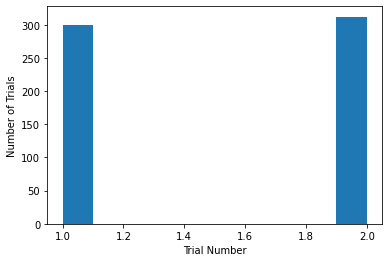

In [54]:
## First, evaluate how many trials exist between conditions 1 and 2 via a histogram
plt.hist(trialConds)
plt.xlabel('Trial Number')
plt.ylabel('Number of Trials')

From the histogram, it can be determined that there are 300 trials for the first condition and 312 trials from the second condition

In [55]:
D = np.append(data, trialConds, axis = 1)

In [56]:
Data_Matrix = D[D[:,3].argsort()]

In [60]:
D1 = Data_Matrix[0:299, 0:3]
D2 = Data_Matrix[300:611,0:3]

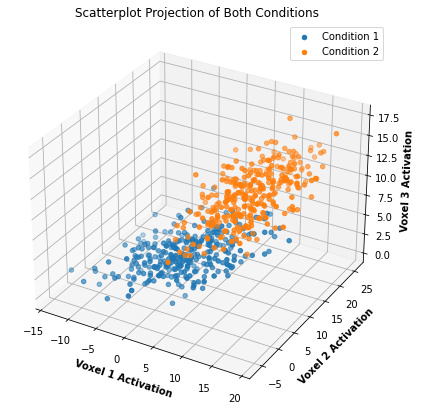

In [61]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(D1[:,0],D1[:,1],D1[:,2])
ax.scatter3D(D2[:,0],D2[:,1],D2[:,2])
plt.title('Scatterplot Projection of Both Conditions')
ax.set_xlabel('Voxel 1 Activation', fontweight ='bold')
ax.set_ylabel('Voxel 2 Activation', fontweight ='bold')
ax.set_zlabel('Voxel 3 Activation', fontweight ='bold')
ax.legend(['Condition 1','Condition 2'])

### Part B
Quantify the response statistics of each individual trial condition. Calculate the mean and covariant of each response cloud using matrix multiplication. Corroborate your results with the built in mean and covariance functions.

In [83]:
# mu can be calculated using D*1/N. This gives the average activation for voxel 1, 2, and 3 (mu1, mu2, mu3 respectively)

# Calculate the mean and covarient through matrix multiplication and then check built-in functions to compare
x1 = np.ones([len(D1),1]) 
mu1_1 = np.dot(D1[:,0],x1)/len(D1)
mu1_2 = np.dot(D1[:,1],x1)/len(D1)
mu1_3 = np.dot(D1[:,2],x1)/len(D1)

mu_cond1 = np.array([mu1_1, mu1_2, mu1_3])

print(mu_cond1)

print(np.mean(D1[:,0]))
print(np.mean(D1[:,1]))
print(np.mean(D1[:,2]))

Cov1_calc = (D1.T@D1)/len(D1) - mu_cond1@mu_cond1.T
Cov1_func = np.cov(D1.T)

print(Cov1_calc)
print(Cov1_func)

[[2.95753062]
 [4.24814805]
 [4.97362125]]
2.9575306226752263
4.24814804850503
4.973621246737921
[[26.01686578  9.81641     4.9043276 ]
 [ 9.81641    15.74557494  3.40735768]
 [ 4.9043276   3.40735768  3.38275258]]
[[26.10417069  9.84935097  4.92078507]
 [ 9.84935097 15.79841244  3.41879176]
 [ 4.92078507  3.41879176  3.3941041 ]]


In [84]:
# Calculate the mean and covariance for condition 2 and check these answers against the built-in python functions

x2 = np.ones([len(D2),1]) 
mu2_1 = np.dot(D2[:,0],x2)/len(D2)
mu2_2 = np.dot(D2[:,1],x2)/len(D2)
mu2_3 = np.dot(D2[:,2],x2)/len(D2)

mu_cond2 = np.array([mu2_1, mu2_2, mu2_3])

print(mu_cond2)

print(np.mean(D2[:,0]))
print(np.mean(D2[:,1]))
print(np.mean(D2[:,2]))

Cov2_calc = (D2.T@D2)/len(D2) - mu_cond2@mu_cond2.T
Cov2_func = np.cov(D2.T)

print(Cov2_calc)
print(Cov2_func)

[[ 9.97706606]
 [12.05903666]
 [11.081714  ]]
9.977066060984816
12.059036661480382
11.081713996706627
[[12.89664087  8.06035209  2.92198414]
 [ 8.06035209 26.75477876  6.37769478]
 [ 2.92198414  6.37769478  4.40717538]]
[[12.93824294  8.08635323  2.93140989]
 [ 8.08635323 26.84108449  6.39826799]
 [ 2.93140989  6.39826799  4.42139208]]


# Part C
Using SVD, plot the three singular vectors origination from the center of each response cloud and scale their amplitudes using the 'S' matrix from SVD

In [88]:
u1,s1,v1 = la.svd(Cov1_calc)
u2,s2,v2 = la.svd(Cov2_calc)
s1 = np.sqrt(np.diag(s1))
s2 = np.sqrt(np.diag(s2))
scalev1 = v1.T@s1
scalev2 = v2.T@s2

In [89]:
print(scalev1)
print(scalev2)

[[-4.82024602  1.65464685 -0.21032811]
 [-2.9394716  -2.65723305 -0.21022414]
 [-1.13050923 -0.14590222  1.44340362]]
[[-2.29611101e+00  2.75634474e+00 -1.64556288e-01]
 [-5.00250971e+00 -1.26451866e+00 -3.61480197e-01]
 [-1.38813395e+00 -2.23800470e-03  1.57488238e+00]]


In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(D1[:,0],D1[:,1],D1[:,2])
ax.scatter3D(D2[:,0],D2[:,1],D2[:,2])
plt.title('Scatterplot Projection of Both Conditions')
ax.set_xlabel('Voxel 1 Activation', fontweight ='bold')
ax.set_ylabel('Voxel 2 Activation', fontweight ='bold')
ax.set_zlabel('Voxel 3 Activation', fontweight ='bold')
ax.legend(['Condition 1','Condition 2'])